In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
import random
import kmeans

In [2]:
scale = preprocessing.MinMaxScaler()

In [3]:
df1 = pd.read_csv('/Users/amalalmansour/Downloads/MaxSlice_LIDC.csv')
df2 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/Agreement_Binary_Rating.csv')

In [4]:
ID_agree = df2[['InstanceID','Agreement_name']]
ID_agree

,InstanceID,Agreement_name
0,4,Low Radiologist Agreement
1,118,All Radiologist Agreement
2,134,Low Radiologist Agreement
3,143,Low Radiologist Agreement
4,175,All Radiologist Agreement
...,...,...
1327,40771,High Radiologist Agreement
1328,40780,Low Radiologist Agreement
1329,40794,No Radiologist Agreement
1330,40801,No Radiologist Agreement


In [5]:
train_slices = pd.merge(ID_agree, df1)
display(train_slices)

,InstanceID,Agreement_name,noduleID,DicomImage,FilePath,subtlety,internalStructure,calcification,sphericity,margin,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,4,Low Radiologist Agreement,1,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0001\1.3.6.1....,5,1,6,3,3,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,118,All Radiologist Agreement,5,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,4,1,6,4,5,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052
2,134,Low Radiologist Agreement,3,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,5,1,6,5,4,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,143,Low Radiologist Agreement,4,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,3,1,6,5,5,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,175,All Radiologist Agreement,6,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0004\1.3.6.1....,5,1,3,5,5,...,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000,0.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,40771,High Radiologist Agreement,2655,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1010\1.3.6.1....,3,1,6,2,5,...,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000,0.0090
1328,40780,Low Radiologist Agreement,2657,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,5,5,...,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000,0.0013
1329,40794,No Radiologist Agreement,2656,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,3,2,...,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000,0.0020
1330,40801,No Radiologist Agreement,2658,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,4,6,3,3,...,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000,0.0018


In [6]:
numeric_feature_names = ['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
                         'MajorAxisLength', 'MinorAxisLength',
                         'Elongation', 'Compactness', 'Eccentricity', 'Solidity', 'Extent',
                         'Circularity', 'RadialDistanceSD', 'SecondMoment', 'Roughness', 'MinIntensity',
                         'MaxIntensity', 'MeanIntensity', 'SDIntensity', 'MinIntensityBG',
                         'MaxIntensityBG', 'MeanIntensityBG', 'SDIntensityBG',
                         'IntensityDifference', 'markov1', 'markov2', 'markov3', 'markov4',
                         'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
                         'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
                         'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
                         'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
                         'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
                         'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
                         'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
                         'Entropy', 'x_3rdordermoment', 'Inversevariance', 'Sumaverage',
                         'Variance', 'Clustertendency']

In [7]:
df_feature = train_slices[['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
                         'MajorAxisLength', 'MinorAxisLength',
                         'Elongation', 'Compactness', 'Eccentricity', 'Solidity', 'Extent',
                         'Circularity', 'RadialDistanceSD', 'SecondMoment', 'Roughness', 'MinIntensity',
                         'MaxIntensity', 'MeanIntensity', 'SDIntensity', 'MinIntensityBG',
                         'MaxIntensityBG', 'MeanIntensityBG', 'SDIntensityBG',
                         'IntensityDifference', 'markov1', 'markov2', 'markov3', 'markov4',
                         'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
                         'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
                         'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
                         'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
                         'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
                         'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
                         'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
                         'Entropy', 'x_3rdordermoment', 'Inversevariance', 'Sumaverage',
                         'Variance', 'Clustertendency']]

In [8]:
df_feature

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Contrast,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,30300,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000
1,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,58900,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,22400,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,61400,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000
4,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,0.532931,...,172000,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,73,75,32.384776,32.028485,9.640876,11.517956,8.186050,1.407022,1.143271,0.703474,...,79100,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000
1328,638,759,122.811183,111.554028,28.501348,40.463803,22.859777,1.770087,1.881245,0.825129,...,32400,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000
1329,437,464,84.669048,79.410448,23.588253,27.044347,21.611186,1.251405,1.305443,0.601196,...,30500,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000
1330,657,674,98.083261,94.830869,28.922627,33.204797,25.377464,1.308436,1.165238,0.644895,...,69700,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000


In [9]:
df_feature = pd.DataFrame(scale.fit_transform(df_feature.values), columns= numeric_feature_names)
df_feature = np.array(df_feature)

In [10]:
# Fit centroids to dataset
centers = 1
kmeans = kmeans.KMeans(n_clusters=centers)
kmeans.fit(df_feature)
#centroid = kmeans.evaluate(df_feature)
centroid = kmeans.centroids

In [11]:
centroid

[array([0.08353424, 0.08745844, 0.13308335, 0.17660187, 0.18346463,
        0.19724445, 0.17096326, 0.16410544, 0.06258428, 0.6265107 ,
        0.8898571 , 0.62890114, 0.83128964, 0.13100852, 0.08066358,
        0.1270658 , 0.64568643, 0.42339752, 0.5598134 , 0.25139272,
        0.66541681, 0.4783601 , 0.6024063 , 0.24390779, 0.24876874,
        0.05930057, 0.02032651, 0.04919545, 0.05077387, 0.10356712,
        0.47141456, 0.68097685, 0.44966402, 0.6620698 , 0.54703867,
        0.66675671, 0.42923386, 0.6612908 , 0.49131338, 0.64250848,
        0.38747053, 0.65416918, 0.48022988, 0.67181172, 0.4196885 ,
        0.64967552, 0.55206316, 0.66636951, 0.48608648, 0.68030622,
        0.5179239 , 0.68588795, 0.4810459 , 0.66009702, 0.08496331,
        0.66878789, 0.22036766, 0.21007356, 0.37288899, 0.55918188,
        0.15272845, 0.31478795, 0.10852426, 0.10117372])]

In [12]:
dist = kmeans.euclidean(centroid, df_feature)

In [13]:
dist

array([1.90936328, 0.87228214, 1.51039733, ..., 0.99831338, 1.15424187,
       0.52033388])

In [14]:
df_distance = pd.DataFrame()

In [15]:
df_distance['InstanceID'] = train_slices['InstanceID'] 
df_distance['Agreement'] = train_slices['Agreement_name']
df_distance['Distance'] = dist
display(df_distance)

,InstanceID,Agreement,Distance
0,4,Low Radiologist Agreement,1.909363
1,118,All Radiologist Agreement,0.872282
2,134,Low Radiologist Agreement,1.510397
3,143,Low Radiologist Agreement,0.614242
4,175,All Radiologist Agreement,0.781696
...,...,...,...
1327,40771,High Radiologist Agreement,0.828986
1328,40780,Low Radiologist Agreement,1.677785
1329,40794,No Radiologist Agreement,0.998313
1330,40801,No Radiologist Agreement,1.154242


In [16]:
df_distance.to_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/DF_spic_var_distance.csv")

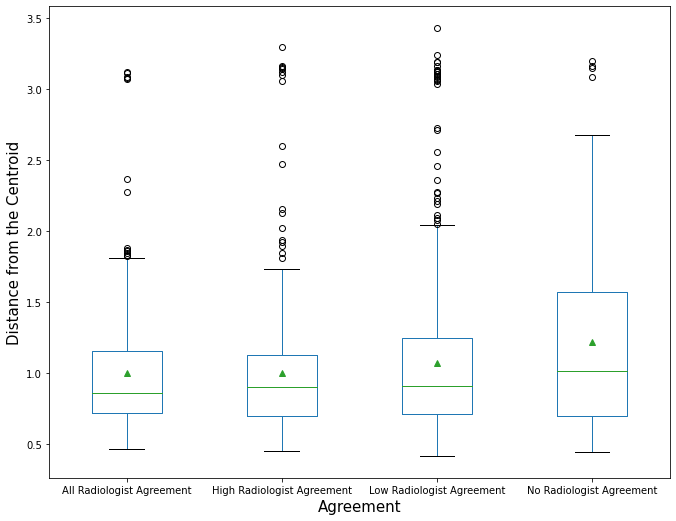

In [17]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

axes = df_distance.boxplot(by='Agreement',column =['Distance'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')
#plt.ylim([0.0, 1.0])
plt.ylabel("Distance from the Centroid", fontdict={'fontsize':15})
plt.xlabel("Agreement", fontdict={'fontsize':15})
#plt.xticks([0,1, 2, 3],['No Radiologist Agreement', 'Low Radiologist Agreement', 'High Radiologist Agreement', 'All Radiologists Agree'])
plt.show()

In [18]:
m1 = df_distance.groupby(['Agreement'])['Distance'].mean().values
print(m1)

[0.99891551 1.00051307 1.06975708 1.21953957]


In [19]:
m2 = df_distance.groupby(['Agreement'])['Distance'].median().values
print(m2)

[0.85578986 0.89832897 0.90545295 1.00973873]
